In [49]:
from flyingpigeon import sdm 
reload(sdm)
from datetime import datetime as dt

tic = dt.now()

ncs_references = ['/home/nils/.conda/envs/birdhouse/etc/pywps/TNn_EUR-11_CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_CLMcom-CCLM4-8-17_v1_Jan_ref-all.nc', 
                 '/home/nils/.conda/envs/birdhouse/etc/pywps/TG_EUR-11_CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_CLMcom-CCLM4-8-17_v1_JJA_ref-all.nc', 
                 '/home/nils/.conda/envs/birdhouse/etc/pywps/PRCPTOT_EUR-11_CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_CLMcom-CCLM4-8-17_v1_JJA_ref-all.nc'
                 ]

#ncs_indices = ['/home/nils/data/sdm/TG_EUR-11_CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_CLMcom-CCLM4-8-17_v1_JJA_20010101-20050101.nc',
#'/home/nils/data/sdm/TG_EUR-11_ICHEC-EC-EARTH_historical_r12i1p1_CLMcom-CCLM4-8-17_v1_JJA_20010101-20050101.nc',
#'/home/nils/data/sdm/TG_EUR-11_ICHEC-EC-EARTH_historical_r1i1p1_KNMI-RACMO22E_v1_JJA_20010101-20050101.nc',
#'/home/nils/data/sdm/TG_EUR-11_MOHC-HadGEM2-ES_historical_r1i1p1_CLMcom-CCLM4-8-17_v1_JJA_20010101-20050101.nc',
#'/home/nils/data/sdm/TG_EUR-11_MOHC-HadGEM2-ES_historical_r1i1p1_KNMI-RACMO22E_v1_JJA_20010101-20050101.nc']

In [3]:
csv = '/home/nils/Downloads/0013848-160118175350007.csv'
latlon = sdm.get_latlon(csv)

PApoints = sdm.get_PAmask(coordinates=latlon)

In [ ]:
dataf = sdm.get_gam(ncs_references,PApoints)

In [ ]:
#dataf.sample
#reload(sdm)
gam_model, predict_ref, gam_info = sdm.get_gam(ncs_references,PApoints)
print gam_model.names

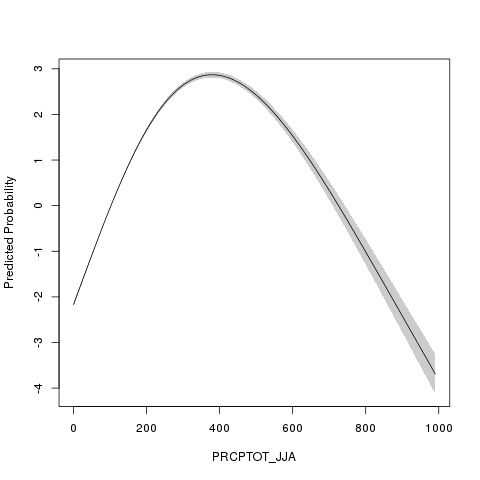

In [48]:
from IPython.display import Image
Image(filename=gam_info)

In [ ]:
prediction = sdm.get_prediction(gam_model, ncs_indices)

from numpy import invert, isnan, nan, broadcast_arrays, array, zeros, linspace, meshgrid
mask = invert(isnan(PApoints))
mask = broadcast_arrays(prediction, mask)[1]
prediction[mask==False] = nan

species_file = sdm.write_to_file(ncs_indices[0], prediction)

tac = dt.now()

print 'prediction finished in %s minutes' % (tac - tic)